### Import libraries

In [373]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf

import shap
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

import keras
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Dropout
import keras_tuner as kt

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

### Load csv file

In [374]:
dataset_df = pd.read_csv("data/dataset.csv", sep = ";", index_col = "Customer_ID", decimal = ',')
print("Dataset shape: " + str(dataset_df.shape))

Dataset shape: (100000, 99)


### Dataset description and information

In [375]:
dataset_df.head()

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,dwllsize,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays
Customer_ID,,,,,,,,,,,,,,,,,,,,,
1000001,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,-157.25,...,A,0.0,N,U,U,U,U,U,Y,361.0
1000002,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,532.25,...,A,0.0,Z,U,U,U,U,U,Y,240.0
1000003,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0.0,0.0,-4.25,...,A,0.0,N,U,Y,U,U,U,Y,1504.0
1000004,38.0000,7.50,38.000,0.0000,0.00,0.0,0.0,0.0,0.0,-1.50,...,D,0.0,U,Y,U,U,U,U,Y,1812.0
1000005,55.2300,570.50,71.980,0.0000,0.00,0.0,0.0,0.0,0.0,38.50,...,O,0.0,I,U,U,U,U,U,Y,434.0


In [376]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 1000001 to 1100000
Data columns (total 99 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   rev_Mean          99643 non-null   float64
 1   mou_Mean          99643 non-null   float64
 2   totmrc_Mean       99643 non-null   float64
 3   da_Mean           99643 non-null   float64
 4   ovrmou_Mean       99643 non-null   float64
 5   ovrrev_Mean       99643 non-null   float64
 6   vceovr_Mean       99643 non-null   float64
 7   datovr_Mean       99643 non-null   float64
 8   roam_Mean         99643 non-null   float64
 9   change_mou        99109 non-null   float64
 10  change_rev        99109 non-null   float64
 11  drop_vce_Mean     100000 non-null  float64
 12  drop_dat_Mean     100000 non-null  float64
 13  blck_vce_Mean     100000 non-null  float64
 14  blck_dat_Mean     100000 non-null  float64
 15  unan_vce_Mean     100000 non-null  float64
 16  unan_dat_Mean

In [377]:
dataset_df.describe()

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,phones,models,truck,rv,lor,adults,income,numbcars,forgntvl,eqpdays
count,99643.000000,99643.000000,99643.000000,99643.000000,99643.000000,99643.000000,99643.000000,99643.000000,99643.000000,99109.000000,...,99999.000000,99999.000000,98268.000000,98268.000000,69810.000000,76981.000000,74564.000000,50634.000000,98268.000000,99999.000000
mean,58.719985,513.559937,46.179136,0.888828,41.072247,13.559560,13.295062,0.261318,1.286405,-13.933818,...,1.787118,1.545825,0.188820,0.082580,6.177238,2.530326,5.783112,1.567563,0.057974,391.932309
std,46.291677,525.168140,23.623489,2.177619,97.296150,30.500885,30.056089,3.126531,14.711374,276.087509,...,1.313977,0.898395,0.391368,0.275248,4.735267,1.452819,2.182132,0.625456,0.233696,256.482193
min,-6.167500,0.000000,-26.915000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3875.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,-5.000000
25%,33.260000,150.750000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-87.000000,...,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,4.000000,1.000000,0.000000,212.000000
50%,48.195000,355.500000,44.990000,0.247500,2.750000,1.000000,0.682500,0.000000,0.000000,-6.250000,...,1.000000,1.000000,0.000000,0.000000,5.000000,2.000000,6.000000,1.000000,0.000000,342.000000
75%,70.750000,703.000000,59.990000,0.990000,42.000000,14.437500,14.025000,0.000000,0.235000,63.000000,...,2.000000,2.000000,0.000000,0.000000,9.000000,3.000000,7.000000,2.000000,0.000000,530.000000
max,3843.262500,12206.750000,409.990000,159.390000,4320.750000,1102.400000,896.087500,423.540000,3685.200000,31219.250000,...,28.000000,16.000000,1.000000,1.000000,15.000000,6.000000,9.000000,3.000000,1.000000,1823.000000


### Column types:

In [378]:
cols = dataset_df.columns
float_columns = list(dataset_df.select_dtypes(include='float64'))
int_columns = list(dataset_df.select_dtypes(include='int64'))
object_columns = list(dataset_df.select_dtypes(include='object'))

print("Float columns: " + str(float_columns))
print("Int columns: " + str(int_columns))
print("Object columns: " + str(object_columns))

Float columns: ['rev_Mean', 'mou_Mean', 'totmrc_Mean', 'da_Mean', 'ovrmou_Mean', 'ovrrev_Mean', 'vceovr_Mean', 'datovr_Mean', 'roam_Mean', 'change_mou', 'change_rev', 'drop_vce_Mean', 'drop_dat_Mean', 'blck_vce_Mean', 'blck_dat_Mean', 'unan_vce_Mean', 'unan_dat_Mean', 'plcd_vce_Mean', 'plcd_dat_Mean', 'recv_vce_Mean', 'recv_sms_Mean', 'comp_vce_Mean', 'comp_dat_Mean', 'custcare_Mean', 'ccrndmou_Mean', 'cc_mou_Mean', 'inonemin_Mean', 'threeway_Mean', 'mou_cvce_Mean', 'mou_cdat_Mean', 'mou_rvce_Mean', 'owylis_vce_Mean', 'mouowylisv_Mean', 'iwylis_vce_Mean', 'mouiwylisv_Mean', 'peak_vce_Mean', 'peak_dat_Mean', 'mou_peav_Mean', 'mou_pead_Mean', 'opk_vce_Mean', 'opk_dat_Mean', 'mou_opkv_Mean', 'mou_opkd_Mean', 'drop_blk_Mean', 'attempt_Mean', 'complete_Mean', 'callfwdv_Mean', 'callwait_Mean', 'totmou', 'totrev', 'adjrev', 'adjmou', 'avgrev', 'avgmou', 'avgqty', 'avg6mou', 'avg6qty', 'avg6rev', 'hnd_price', 'phones', 'models', 'truck', 'rv', 'lor', 'adults', 'income', 'numbcars', 'forgntvl',

In [379]:
cols_to_int = ['phones', 'models', 'lor', 'adults', 'income', 'numbcars']
cols_to_bool = ['truck', 'rv', 'forgntvl']

for col in cols_to_int:
    float_columns.remove(col)
    int_columns.append(col)

for col in cols_to_bool:
    float_columns.remove(col)
    object_columns.append(col)

print(dataset_df['phones'].unique())
print(dataset_df['models'].unique())
print(dataset_df['truck'].unique())
print(dataset_df['rv'].unique())
print(dataset_df['lor'].unique())
print(dataset_df['adults'].unique())
print(dataset_df['income'].unique())
print(dataset_df['numbcars'].unique())
print(dataset_df['forgntvl'].unique())

[ 2.  7.  1.  6.  9.  4.  3. 10.  5. 13.  8. 18. 12. 11. 24. 15. 14. 17.
 16. 19. 22. 21. 20. nan 28.]
[ 2.  6.  1.  4.  3.  5.  7.  9. 10.  8. 11. 15. 14. nan 16.]
[ 0.  1. nan]
[ 0.  1. nan]
[15.  1.  7.  6.  5.  8.  0.  3.  4. 11. 10. 13. nan  2. 14. 12.  9.]
[ 1.  2.  4.  3.  5. nan  6.]
[ 4.  5.  6.  9.  1.  7.  3. nan  8.  2.]
[ 3.  1.  2. nan]
[ 0.  1. nan]


In [380]:
# dataset_df['hnd_webcap'].fillna('UNKW', inplace = True)

In [381]:
# dataset_df['asl_flag'].fillna('U', inplace = True)

  adjustable: {'box', 'datalim'}
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  anchor: (float, float) or {'C', 'SW', 'S', 'SE', 'E', 'NE', ...}
  animated: bool
  aspect: {'auto', 'equal'} or float
  autoscale_on: bool
  autoscalex_on: unknown
  autoscaley_on: unknown
  axes_locator: Callable[[Axes, Renderer], Bbox]
  axisbelow: bool or 'line'
  box_aspect: float or None
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  facecolor or fc: color
  figure: `.Figure`
  frame_on: bool
  gid: str
  in_layout: bool
  label: object
  mouseover: bool
  navigate: bool
  navigate_mode: unknown
  path_effects: `.AbstractPathEffect`
  picker: None or bool or float or callable
  position: [left, bottom, width, height] or `~matplotlib.transforms.Bbox`
  prop_cycle: unknown
  rasterization_zorder: float or None
  ras

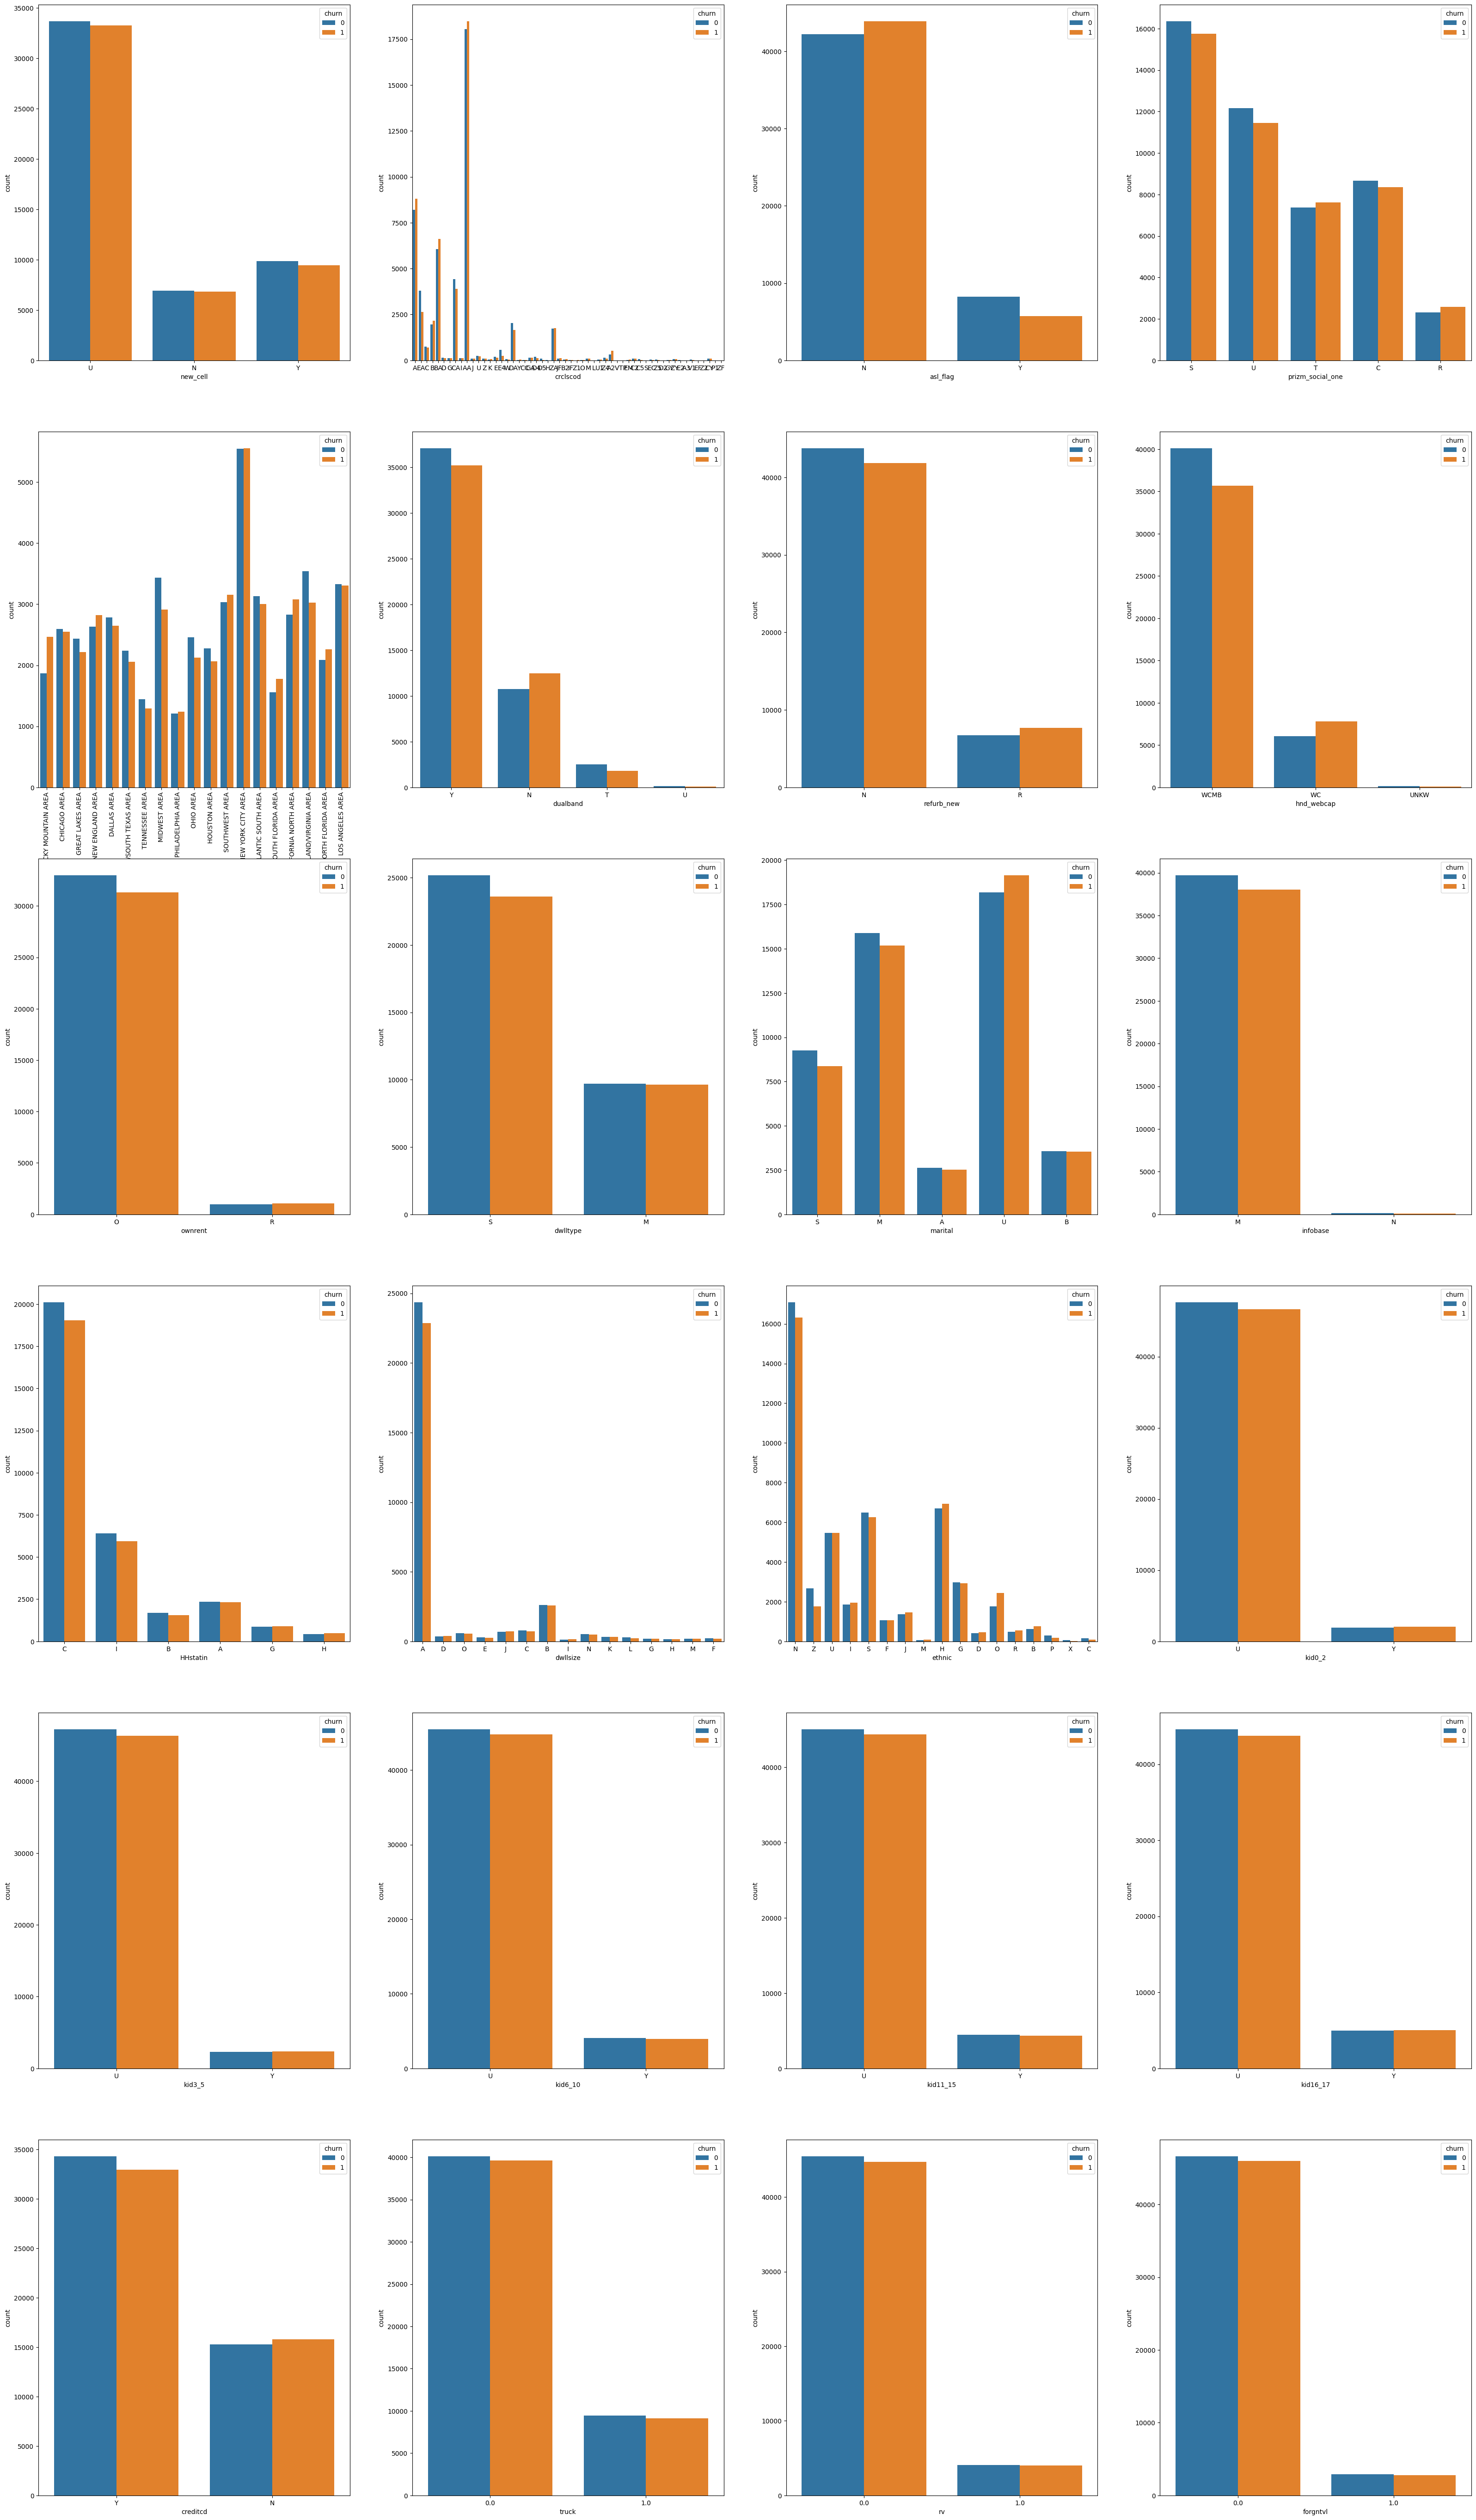

In [382]:
fig, axs = plt.subplots(6, 4)
flat_axs = axs.flatten()
for i in range(len(object_columns)):
    sns.countplot(ax = flat_axs[i], x = object_columns[i], hue = "churn", data = dataset_df)
    flat_axs[i].tick_params(axis='x', rotation=90) if object_columns[i] == 'area' else flat_axs[i].tick_params(axis='x')

plt.setp(axs[-1, :])
plt.setp(axs[:, 0])
fig.set_size_inches(40, 70)
plt.show()

In [383]:
from tabulate import tabulate
for col_name in object_columns:
    print(tabulate(dataset_df.groupby(col_name)['churn'].value_counts(normalize=True).unstack(fill_value=0), headers='keys', tablefmt='psql'))

+------------+----------+----------+
| new_cell   |        0 |        1 |
|------------+----------+----------|
| N          | 0.503373 | 0.496627 |
| U          | 0.503049 | 0.496951 |
| Y          | 0.509715 | 0.490285 |
+------------+----------+----------+
+------------+----------+----------+
| crclscod   |        0 |        1 |
|------------+----------+----------|
| A          | 0.482702 | 0.517298 |
| A2         | 0.384437 | 0.615563 |
| A3         | 0.333333 | 0.666667 |
| AA         | 0.494316 | 0.505684 |
| B          | 0.475669 | 0.524331 |
| B2         | 0.46789  | 0.53211  |
| BA         | 0.478724 | 0.521276 |
| C          | 0.520604 | 0.479396 |
| C2         | 0.527778 | 0.472222 |
| C5         | 0.703704 | 0.296296 |
| CA         | 0.531317 | 0.468683 |
| CC         | 0.52     | 0.48     |
| CY         | 0.547368 | 0.452632 |
| D          | 0.550607 | 0.449393 |
| D2         | 0.6      | 0.4      |
| D4         | 0.627907 | 0.372093 |
| D5         | 0.807018 | 0.192982 |
|

### Dropping columns with no significant effect on the target variable

In [384]:
dataset_df.drop(columns = ['new_cell',
                            'prizm_social_one',
                            'area',
                            'refurb_new',  
                            'ownrent',
                            'dwlltype',
                            'marital', 
                            'HHstatin', 
                            'dwllsize',
                            'rv',
                            'truck', 
                            'forgntvl', 
                            'kid0_2', 
                            'kid3_5', 
                            'kid6_10', 
                            'kid11_15', 
                            'kid16_17',
                            'creditcd'], inplace = True)

In [385]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 1000001 to 1100000
Data columns (total 81 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   rev_Mean         99643 non-null   float64
 1   mou_Mean         99643 non-null   float64
 2   totmrc_Mean      99643 non-null   float64
 3   da_Mean          99643 non-null   float64
 4   ovrmou_Mean      99643 non-null   float64
 5   ovrrev_Mean      99643 non-null   float64
 6   vceovr_Mean      99643 non-null   float64
 7   datovr_Mean      99643 non-null   float64
 8   roam_Mean        99643 non-null   float64
 9   change_mou       99109 non-null   float64
 10  change_rev       99109 non-null   float64
 11  drop_vce_Mean    100000 non-null  float64
 12  drop_dat_Mean    100000 non-null  float64
 13  blck_vce_Mean    100000 non-null  float64
 14  blck_dat_Mean    100000 non-null  float64
 15  unan_vce_Mean    100000 non-null  float64
 16  unan_dat_Mean    100000 non-nul

In [386]:
dataset_df.shape

(100000, 81)

### Total number of missing values

In [387]:
dataset_df.isna().sum().sum()

176374

### Missing values per column

In [388]:
na_per_column = np.array(dataset_df.isna().sum(axis = 0))
for i in range(len(na_per_column)):
    if na_per_column[i] == 0:
        continue
    print(dataset_df.columns[i] + ": " + str(na_per_column[i]))

rev_Mean: 357
mou_Mean: 357
totmrc_Mean: 357
da_Mean: 357
ovrmou_Mean: 357
ovrrev_Mean: 357
vceovr_Mean: 357
datovr_Mean: 357
roam_Mean: 357
change_mou: 891
change_rev: 891
avg6mou: 2839
avg6qty: 2839
avg6rev: 2839
dualband: 1
hnd_price: 847
phones: 1
models: 1
hnd_webcap: 10189
lor: 30190
adults: 23019
infobase: 22079
income: 25436
numbcars: 49366
ethnic: 1732
eqpdays: 1


### Hnd_webcap has an 'unknown' category -> Replace with fillna

In [389]:
print(dataset_df['hnd_webcap'].unique())
dataset_df['hnd_webcap'].fillna('UNKW', inplace = True)
print(dataset_df['hnd_webcap'].unique())

['WCMB' 'WC' nan 'UNKW']
['WCMB' 'WC' 'UNKW']


### Check if columns with equal number of NaNs have NaNs in the same rows

In [390]:
id_cols_1na = np.argwhere(na_per_column == 1).squeeze()
cols_1na = dataset_df.columns[id_cols_1na]

id_cols_357na = np.argwhere(na_per_column == 357).squeeze()
cols_357na = dataset_df.columns[id_cols_357na]

id_cols_891na = np.argwhere(na_per_column == 891).squeeze()
cols_891na = dataset_df.columns[id_cols_891na]

In [391]:
def get_nan_rows(col_names):
    nan_rows = []
    for name in col_names:
        col = dataset_df[name].isna().to_numpy()
        nan_rows.append(np.argwhere(col == True).squeeze())
    return np.array(nan_rows)

def check_all_rows_the_same(nan_rows):
    return np.all(np.bitwise_and.reduce(nan_rows) == nan_rows[0])

nan_rows_1 = get_nan_rows(cols_1na)
nan_rows_357 = get_nan_rows(cols_357na)
nan_rows_891 = get_nan_rows(cols_891na)

print(nan_rows_1)
print(check_all_rows_the_same(nan_rows_1))
print(check_all_rows_the_same(nan_rows_357))
print(check_all_rows_the_same(nan_rows_891))

[77199 77199 77199 77199]
True
True
True


### Delete row with 1 NaN for 4 columns - line 77199 / Customer 1077200

In [392]:
print(dataset_df['dualband'].loc[[1077200]])
print(dataset_df['phones'].loc[[1077200]])
print(dataset_df['models'].loc[[1077200]])
print(dataset_df['eqpdays'].loc[[1077200]])

dataset_df.drop([1077200], inplace = True)
print(dataset_df.shape)

Customer_ID
1077200    NaN
Name: dualband, dtype: object
Customer_ID
1077200   NaN
Name: phones, dtype: float64
Customer_ID
1077200   NaN
Name: models, dtype: float64
Customer_ID
1077200   NaN
Name: eqpdays, dtype: float64
(99999, 81)


### Fill NaN values with the mean

In [393]:
dataset_df['rev_Mean'].fillna(dataset_df['rev_Mean'].mean(), inplace = True)
dataset_df['mou_Mean'].fillna(dataset_df['mou_Mean'].mean(), inplace = True)
dataset_df['totmrc_Mean'].fillna(dataset_df['totmrc_Mean'].mean(), inplace = True)
dataset_df['da_Mean'].fillna(dataset_df['da_Mean'].mean(), inplace = True)
dataset_df['ovrmou_Mean'].fillna(dataset_df['ovrmou_Mean'].mean(), inplace = True)
dataset_df['ovrrev_Mean'].fillna(dataset_df['ovrrev_Mean'].mean(), inplace = True)
dataset_df['vceovr_Mean'].fillna(dataset_df['vceovr_Mean'].mean(), inplace = True)
dataset_df['datovr_Mean'].fillna(dataset_df['datovr_Mean'].mean(), inplace = True)
dataset_df['roam_Mean'].fillna(dataset_df['roam_Mean'].mean(), inplace = True)

dataset_df['change_mou'].fillna(dataset_df['change_mou'].mean(), inplace = True)
dataset_df['change_rev'].fillna(dataset_df['change_rev'].mean(), inplace = True)

dataset_df['avg6mou'].fillna(dataset_df['avg6mou'].mean(), inplace = True)
dataset_df['avg6qty'].fillna(dataset_df['avg6qty'].mean(), inplace = True)
dataset_df['avg6rev'].fillna(dataset_df['avg6rev'].mean(), inplace = True)

dataset_df['hnd_price'].fillna(dataset_df['hnd_price'].mean(), inplace = True)

### NaN values per column

In [394]:
na_per_column = np.array(dataset_df.isna().sum(axis = 0))
for i in range(len(na_per_column)):
    if na_per_column[i] == 0:
        continue
    print(dataset_df.columns[i] + ": " + str(na_per_column[i]))

lor: 30189
adults: 23018
infobase: 22078
income: 25435
numbcars: 49365
ethnic: 1732


### Get all columns above 10% NaN values and evaluate their importance to the target variable (churn)

In [395]:
na_above10 = np.argwhere(na_per_column > 10000).squeeze()
print(na_above10)

[74 75 76 77 78]


In [396]:
na_above10_cols = np.array(dataset_df.columns)[na_above10]

for col_name in na_above10_cols:
    print(str(dataset_df[col_name].isna().sum()) + " - " + col_name + ": " + str(dataset_df[col_name].unique()))

30189 - lor: [15.  1.  7.  6.  5.  8.  0.  3.  4. 11. 10. 13. nan  2. 14. 12.  9.]
23018 - adults: [ 1.  2.  4.  3.  5. nan  6.]
22078 - infobase: ['M' nan 'N']
25435 - income: [ 4.  5.  6.  9.  1.  7.  3. nan  8.  2.]
49365 - numbcars: [ 3.  1.  2. nan]


### Fill NaN values accorddingly to the rest of the variables

In [397]:
for col_name in na_above10_cols:
    print(tabulate(dataset_df.groupby(col_name)['churn'].value_counts(normalize=True).unstack(fill_value=0), headers='keys', tablefmt='psql'))

+-------+----------+----------+
|   lor |        0 |        1 |
|-------+----------+----------|
|     0 | 0.468308 | 0.531692 |
|     1 | 0.482328 | 0.517672 |
|     2 | 0.485476 | 0.514524 |
|     3 | 0.502137 | 0.497863 |
|     4 | 0.508227 | 0.491773 |
|     5 | 0.519481 | 0.480519 |
|     6 | 0.518395 | 0.481605 |
|     7 | 0.533849 | 0.466151 |
|     8 | 0.52065  | 0.47935  |
|     9 | 0.516616 | 0.483384 |
|    10 | 0.536481 | 0.463519 |
|    11 | 0.524218 | 0.475782 |
|    12 | 0.544334 | 0.455666 |
|    13 | 0.535433 | 0.464567 |
|    14 | 0.52455  | 0.47545  |
|    15 | 0.551792 | 0.448208 |
+-------+----------+----------+
+----------+----------+----------+
|   adults |        0 |        1 |
|----------+----------+----------|
|        1 | 0.509395 | 0.490605 |
|        2 | 0.505142 | 0.494858 |
|        3 | 0.512402 | 0.487598 |
|        4 | 0.519709 | 0.480291 |
|        5 | 0.514428 | 0.485572 |
|        6 | 0.521379 | 0.478621 |
+----------+----------+----------+
+---------

In [398]:
dataset_df.drop(columns = ['lor', 'adults', 'income', 'numbcars'], inplace = True)
dataset_df['infobase'].fillna('U', inplace = True)
dataset_df['ethnic'].fillna('UNKNOWN', inplace = True)

In [399]:
na_per_column = np.array(dataset_df.isna().sum(axis = 0))
for i in range(len(na_per_column)):
    if na_per_column[i] == 0:
        continue
    print(dataset_df.columns[i] + ": " + str(na_per_column[i]))

In [400]:
dataset_df.shape

(99999, 77)

### Drop highly correlated features (threshold = 0.85)

['ovrrev_Mean', 'vceovr_Mean', 'plcd_vce_Mean', 'comp_vce_Mean', 'comp_dat_Mean', 'cc_mou_Mean', 'inonemin_Mean', 'mou_cvce_Mean', 'peak_vce_Mean', 'peak_dat_Mean', 'mou_peav_Mean', 'opk_vce_Mean', 'opk_dat_Mean', 'mou_opkv_Mean', 'mou_opkd_Mean', 'attempt_Mean', 'complete_Mean', 'totmou', 'adjrev', 'adjmou', 'adjqty', 'avgmou', 'avgqty', 'avg3mou', 'avg3qty', 'avg3rev', 'avg6mou', 'avg6qty', 'avg6rev', 'models']
Index(['rev_Mean', 'mou_Mean', 'totmrc_Mean', 'da_Mean', 'ovrmou_Mean',
       'datovr_Mean', 'roam_Mean', 'change_mou', 'change_rev', 'drop_vce_Mean',
       'drop_dat_Mean', 'blck_vce_Mean', 'blck_dat_Mean', 'unan_vce_Mean',
       'unan_dat_Mean', 'plcd_dat_Mean', 'recv_vce_Mean', 'recv_sms_Mean',
       'custcare_Mean', 'ccrndmou_Mean', 'threeway_Mean', 'mou_cdat_Mean',
       'mou_rvce_Mean', 'owylis_vce_Mean', 'mouowylisv_Mean',
       'iwylis_vce_Mean', 'mouiwylisv_Mean', 'mou_pead_Mean', 'drop_blk_Mean',
       'callfwdv_Mean', 'callwait_Mean', 'churn', 'months', 'uniq

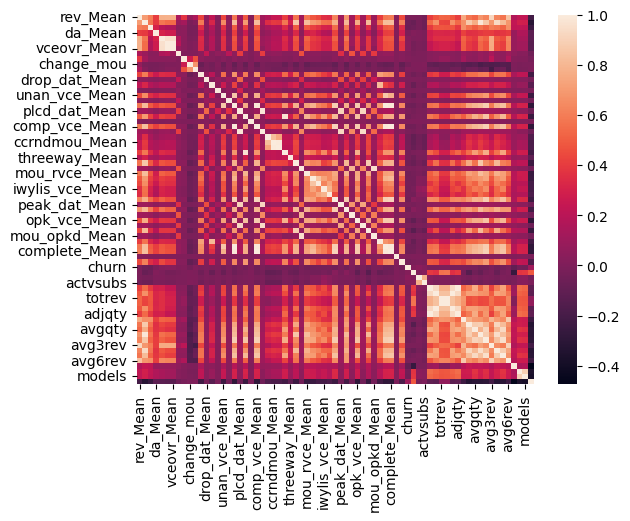

In [401]:
corr = dataset_df.corr(numeric_only = True)
sns.heatmap(corr)

upper_tri = corr.where(np.triu(np.ones(corr.shape), k = 1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.85)]
print(to_drop)
dataset_df.drop(columns = to_drop, inplace = True)

print(dataset_df.columns)
print(dataset_df.shape)

### Check columns again

In [402]:
cols = dataset_df.columns
float_columns = list(dataset_df.select_dtypes(include='float64'))
int_columns = list(dataset_df.select_dtypes(include='int64'))
object_columns = list(dataset_df.select_dtypes(include='object'))

print("Float columns: " + str(float_columns))
print("Int columns: " + str(int_columns))
print("Object columns: " + str(object_columns))

Float columns: ['rev_Mean', 'mou_Mean', 'totmrc_Mean', 'da_Mean', 'ovrmou_Mean', 'datovr_Mean', 'roam_Mean', 'change_mou', 'change_rev', 'drop_vce_Mean', 'drop_dat_Mean', 'blck_vce_Mean', 'blck_dat_Mean', 'unan_vce_Mean', 'unan_dat_Mean', 'plcd_dat_Mean', 'recv_vce_Mean', 'recv_sms_Mean', 'custcare_Mean', 'ccrndmou_Mean', 'threeway_Mean', 'mou_cdat_Mean', 'mou_rvce_Mean', 'owylis_vce_Mean', 'mouowylisv_Mean', 'iwylis_vce_Mean', 'mouiwylisv_Mean', 'mou_pead_Mean', 'drop_blk_Mean', 'callfwdv_Mean', 'callwait_Mean', 'totrev', 'avgrev', 'hnd_price', 'phones', 'eqpdays']
Int columns: ['churn', 'months', 'uniqsubs', 'actvsubs', 'totcalls']
Object columns: ['crclscod', 'asl_flag', 'dualband', 'hnd_webcap', 'infobase', 'ethnic']


In [403]:
print(dataset_df['crclscod'].unique())
print(dataset_df['asl_flag'].unique())
print(dataset_df['dualband'].unique())
print(dataset_df['hnd_webcap'].unique())
print(dataset_df['infobase'].unique())
print(dataset_df['ethnic'].unique())

['A' 'EA' 'C' 'B' 'BA' 'D' 'G' 'CA' 'I' 'AA' 'J' 'U' 'Z' 'K' 'E' 'E4' 'W'
 'DA' 'Y' 'CC' 'GA' 'D4' 'D5' 'H' 'ZA' 'JF' 'B2' 'IF' 'Z1' 'O' 'M' 'L'
 'U1' 'Z4' 'A2' 'V' 'TP' 'EM' 'C2' 'C5' 'S' 'EC' 'Z5' 'D2' 'GY' 'ZY' 'E2'
 'A3' 'V1' 'EF' 'Z2' 'CY' 'P1' 'ZF']
['N' 'Y']
['Y' 'N' 'T' 'U']
['WCMB' 'WC' 'UNKW']
['M' 'U' 'N']
['N' 'Z' 'U' 'I' 'S' 'F' 'J' 'M' 'H' 'G' 'D' 'O' 'UNKNOWN' 'R' 'B' 'P' 'X'
 'C']


In [404]:
dataset_df['crclscod'] = OrdinalEncoder().fit_transform(dataset_df['crclscod'].to_numpy().reshape(-1, 1))

dataset_df['asl_flag'].replace('N', 0, inplace = True)
dataset_df['asl_flag'].replace('Y', 1, inplace = True)

# dualband_ohe_df = pd.get_dummies(dataset_df['dualband'])
# dataset_df = pd.concat([dataset_df, dualband_ohe_df], axis = 1)
# dataset_df.drop(columns = 'dualband', inplace = True)

dataset_df['hnd_webcap'].replace('WC', -1, inplace = True)
dataset_df['hnd_webcap'].replace('UNKW', 0, inplace = True)
dataset_df['hnd_webcap'].replace('WCMB', 1, inplace = True)

dataset_df['infobase'].replace('M', -1, inplace = True)
dataset_df['infobase'].replace('U', 0, inplace = True)
dataset_df['infobase'].replace('N', 1, inplace = True)

# ethnic_ohe_df = pd.get_dummies(dataset_df['ethnic'])
# dataset_df = pd.concat([dataset_df, ethnic_ohe_df], axis = 1)
# dataset_df.drop(columns = 'ethnic', inplace = True)

dataset_df.drop(columns = ['dualband', 'ethnic'], inplace = True)

In [405]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99999 entries, 1000001 to 1100000
Data columns (total 45 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rev_Mean         99999 non-null  float64
 1   mou_Mean         99999 non-null  float64
 2   totmrc_Mean      99999 non-null  float64
 3   da_Mean          99999 non-null  float64
 4   ovrmou_Mean      99999 non-null  float64
 5   datovr_Mean      99999 non-null  float64
 6   roam_Mean        99999 non-null  float64
 7   change_mou       99999 non-null  float64
 8   change_rev       99999 non-null  float64
 9   drop_vce_Mean    99999 non-null  float64
 10  drop_dat_Mean    99999 non-null  float64
 11  blck_vce_Mean    99999 non-null  float64
 12  blck_dat_Mean    99999 non-null  float64
 13  unan_vce_Mean    99999 non-null  float64
 14  unan_dat_Mean    99999 non-null  float64
 15  plcd_dat_Mean    99999 non-null  float64
 16  recv_vce_Mean    99999 non-null  float64
 17  recv

In [406]:
dataset_df.shape

(99999, 45)

In [407]:
dataset_df.insert(len(dataset_df.columns) - 1, 'churn', dataset_df.pop('churn'))

In [408]:
dataset_df.columns

Index(['rev_Mean', 'mou_Mean', 'totmrc_Mean', 'da_Mean', 'ovrmou_Mean',
       'datovr_Mean', 'roam_Mean', 'change_mou', 'change_rev', 'drop_vce_Mean',
       'drop_dat_Mean', 'blck_vce_Mean', 'blck_dat_Mean', 'unan_vce_Mean',
       'unan_dat_Mean', 'plcd_dat_Mean', 'recv_vce_Mean', 'recv_sms_Mean',
       'custcare_Mean', 'ccrndmou_Mean', 'threeway_Mean', 'mou_cdat_Mean',
       'mou_rvce_Mean', 'owylis_vce_Mean', 'mouowylisv_Mean',
       'iwylis_vce_Mean', 'mouiwylisv_Mean', 'mou_pead_Mean', 'drop_blk_Mean',
       'callfwdv_Mean', 'callwait_Mean', 'months', 'uniqsubs', 'actvsubs',
       'crclscod', 'asl_flag', 'totcalls', 'totrev', 'avgrev', 'hnd_price',
       'phones', 'hnd_webcap', 'infobase', 'eqpdays', 'churn'],
      dtype='object')

### Model selection

In [409]:
X_train, X_test, y_train, y_test = train_test_split(dataset_df.to_numpy()[:,:-1], dataset_df.to_numpy()[:,-1], test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [410]:
# X = dataset_df.to_numpy()[:,:-1]
# y = dataset_df.to_numpy()[:,-1]
# kf = KFold(n_splits = 10)
# for i, (train_index, test_index) in enumerate(kf.split(X)):
#     print(f"Fold {i}:")
#     print(f"  Train: index = {len(train_index)}")
#     print(f"  Test:  index = {len(test_index)}")

In [411]:
def mlp_model_builder(hp):

    hp_units1 = hp.Int('units1', min_value=32, max_value=128, step=32)
    hp_units2 = hp.Int('units2', min_value=32, max_value=128, step=32)
    hp_units3 = hp.Int('units3', min_value=32, max_value=128, step=32)

    hp_dropout = hp.Choice('dropout_rate', values=[0.1, 0.2, 0.3, 0.4])
    hp_learning_rate = hp.Choice('learning_rate', values=[0.001, 0.005, 0.01, 0.05])

    mlp_model = Sequential()
    mlp_model.add(Dense(units = hp_units1, activation = 'relu', input_dim = X_train.shape[1]))
    mlp_model.add(Dropout(hp_dropout))
    mlp_model.add(Dense(units = hp_units2, activation = 'relu'))
    mlp_model.add(Dropout(hp_dropout))
    mlp_model.add(Dense(units = hp_units3 , activation = 'relu'))
    mlp_model.add(Dropout(hp_dropout))
    mlp_model.add(Dense(1, activation = 'sigmoid'))

    mlp_model.compile(optimizer=keras.optimizers.Adam(learning_rate = hp_learning_rate),
                loss=keras.losses.BinaryCrossentropy(), metrics = [keras.metrics.BinaryAccuracy(), keras.metrics.FalseNegatives()])

    return mlp_model

mlp_tuner = kt.BayesianOptimization(mlp_model_builder,
                                    objective='binary_accuracy',
                                    max_trials = 10, overwrite = True)

In [412]:
mlp_tuner.search(X_train, y_train, epochs=100, validation_data = (X_val, y_val), batch_size = 512)
best_mlp_hps = mlp_tuner.get_best_hyperparameters(num_trials=1)[0]

best_mlp_model = mlp_tuner.hypermodel.build(best_mlp_hps)
mlp_history = best_mlp_model.fit(X_train, y_train, epochs=100, validation_data = (X_val, y_val), batch_size = 512)


Search: Running Trial #1

Value             |Best Value So Far |Hyperparameter
32                |?                 |units1
96                |?                 |units2
64                |?                 |units3
0.3               |?                 |dropout_rate
0.005             |?                 |learning_rate

Epoch 1/100
125/125 [==============================] - 1s 3ms/step - loss: 6.0109 - binary_accuracy: 0.5033 - false_negatives: 16465.0000 - val_loss: 0.6935 - val_binary_accuracy: 0.4979 - val_false_negatives: 266.0000
Epoch 2/100
125/125 [==============================] - 0s 2ms/step - loss: 0.7115 - binary_accuracy: 0.5063 - false_negatives: 23570.0000 - val_loss: 0.6931 - val_binary_accuracy: 0.5061 - val_false_negatives: 7757.0000
Epoch 3/100
125/125 [==============================] - 0s 2ms/step - loss: 0.6985 - binary_accuracy: 0.5049 - false_negatives: 29511.0000 - val_loss: 0.6931 - val_binary_accuracy: 0.5066 - val_false_negatives: 7894.0000
Epoch 4/100
125/125 [=

KeyboardInterrupt: 

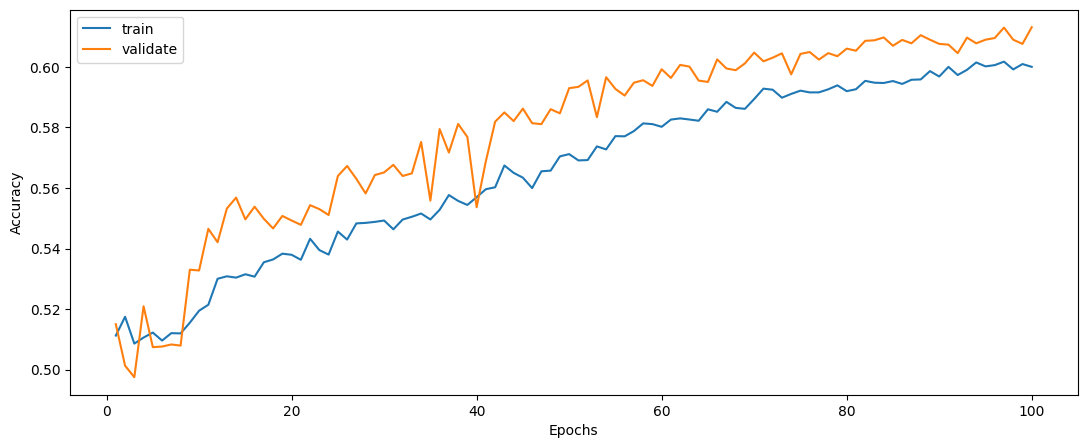

In [371]:
# PLOT TRAIN AND VALIDATION LOSS
def plot_loss(fit_history):
    plt.figure(figsize=(13,5))
    plt.plot(range(1, len(fit_history.history['binary_accuracy'])+1), fit_history.history['binary_accuracy'], label='train')
    plt.plot(range(1, len(fit_history.history['val_binary_accuracy'])+1), fit_history.history['val_binary_accuracy'], label='validate')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plot_loss(mlp_history)

In [372]:
# TESTING FUNCTION
def eval_metrics(actual, pred, mode = 'Test'):
    pred = np.round(pred)
    acc = accuracy_score(actual, pred)
    precision = precision_score(actual, pred)
    recall = recall_score(actual, pred)
    f1 = f1_score(actual, pred)
    
    print(mode + ' set Acc: ' + str(acc) + ', F1: ' + str(f1))
    print('Precision: ' + str(precision) + ', Recall: ' + str(recall))

train_full_pred = best_mlp_model.predict(X_train)
eval_metrics(y_train, train_full_pred, 'Train')

test_at_break_pred = best_mlp_model.predict(X_test)
eval_metrics(y_test, test_at_break_pred)

2000/2000 [==============================] - 1s 269us/step
Train set Acc: 0.6139939686557603, F1: 0.5896072828759387
Precision: 0.6220991376288298, Recall: 0.5603410167350805
625/625 [==============================] - 0s 352us/step
Test set Acc: 0.6056, F1: 0.5814940577249577
Precision: 0.6192090395480226, Recall: 0.5481096219243848
